__Author: Aakarshit Srivastava__

__Team: Perfect Cube__

__Contact: Shubh26002@gmail.com__

# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

# Step 1: Dataset Analysis and Preprocessing
Load the dataset

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

Check for missing values

In [ ]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Explore all the categorical values and visualize them

In [ ]:
gender_dict = data["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

__Understanding the balancing of the Gender column visually__

<AxesSubplot: title={'center': 'Count of different gender'}>

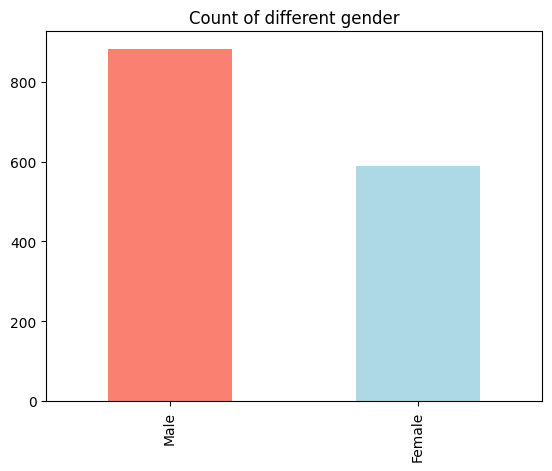

In [ ]:
data['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

In [ ]:
def plot_attr_vs_cols(col):
    pd.crosstab(col,data['Attrition']).plot(kind="bar",figsize=(10,6))
    plt.title(f"Attrition vs {col.name}")
    plt.xlabel("Attrition")
    plt.ylabel(f"No of people who left based on {col.name}")
    plt.legend(["No","Yes"])
    plt.xticks(rotation=0)

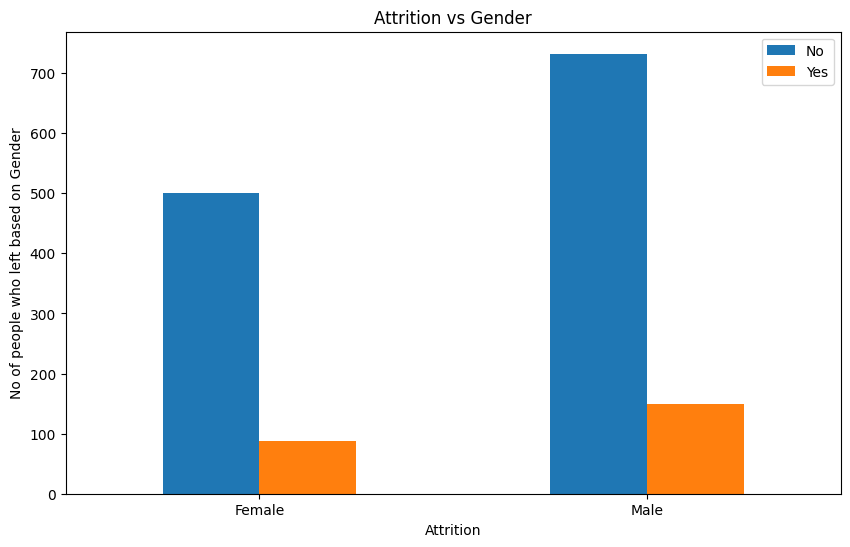

In [ ]:
plot_attr_vs_cols(data['Gender'])

In [ ]:
dept_dict=data['Department'].value_counts()
dept_dict

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot: title={'center': 'Count of different Departments'}>

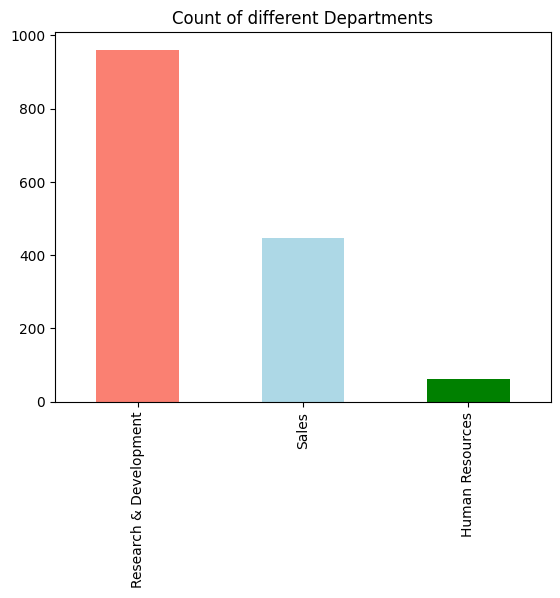

In [ ]:
data['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue','green'],title="Count of different Departments")

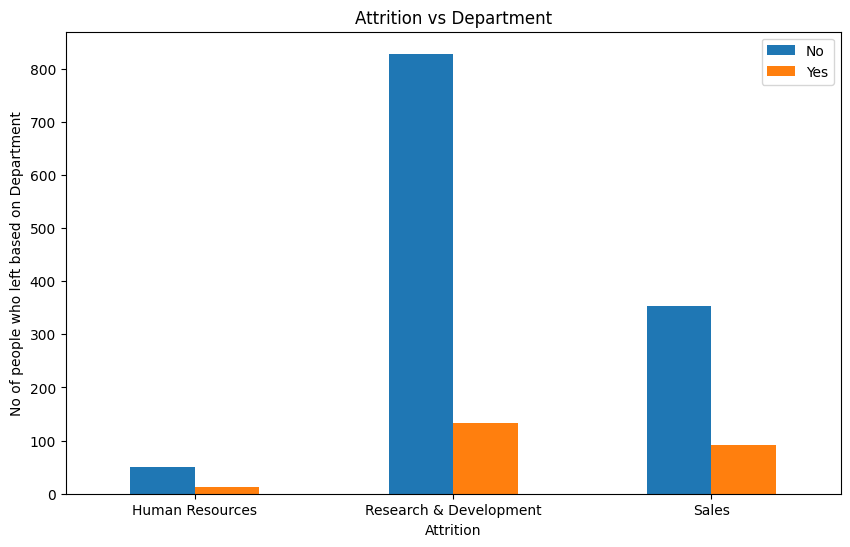

In [ ]:
plot_attr_vs_cols(data['Department'])

In [ ]:
Marital_dict = data["MaritalStatus"].value_counts()
Marital_dict

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot: title={'center': 'Marital Status'}>

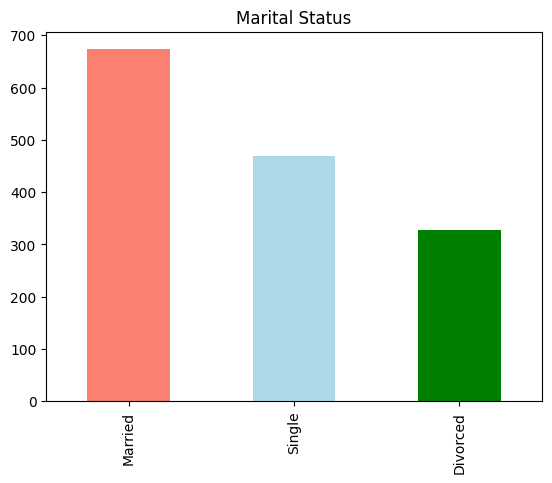

In [ ]:
data['MaritalStatus'].value_counts().plot(kind='bar',color=['salmon','lightblue','green'],title="Marital Status")

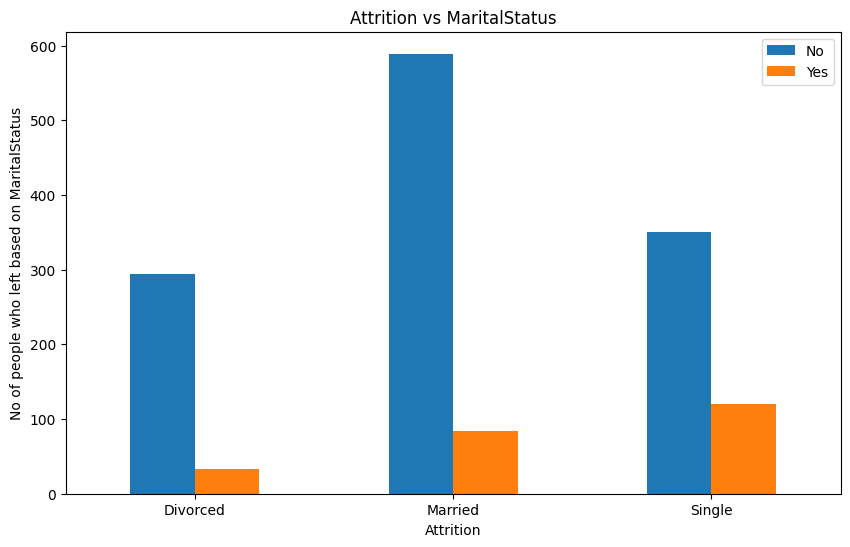

In [ ]:
plot_attr_vs_cols(data['MaritalStatus'])

In [ ]:
job_role_dict=data['JobRole'].value_counts()
job_role_dict

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot: title={'center': 'Job Role'}>

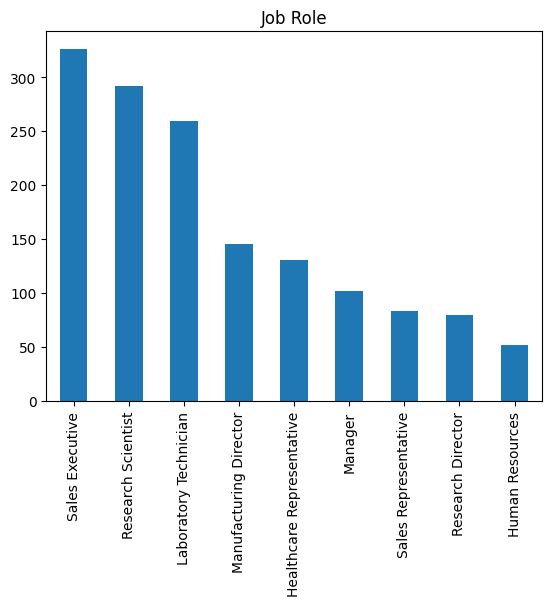

In [ ]:
data["JobRole"].value_counts().plot(kind="bar",title='Job Role')

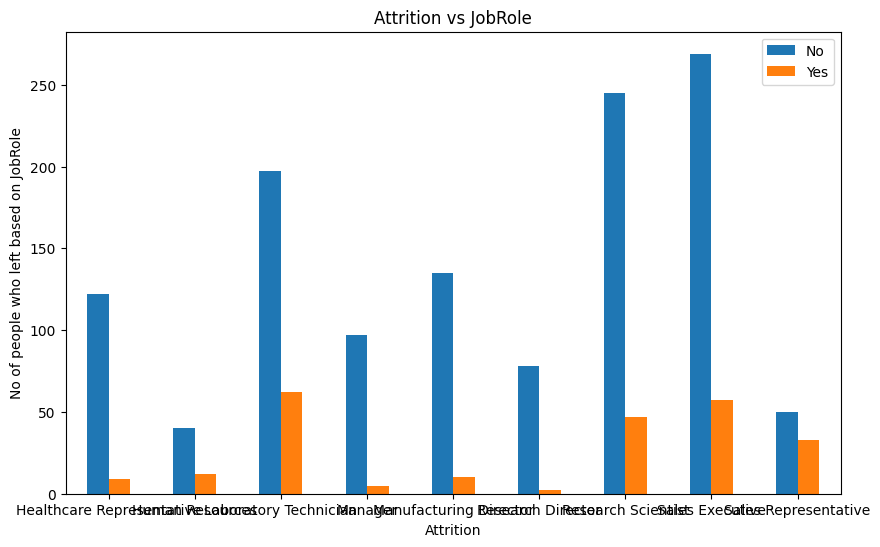

In [ ]:
plot_attr_vs_cols(data["JobRole"])

In [ ]:
education_dict=data["EducationField"].value_counts()
education_dict

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot: title={'center': 'Education'}>

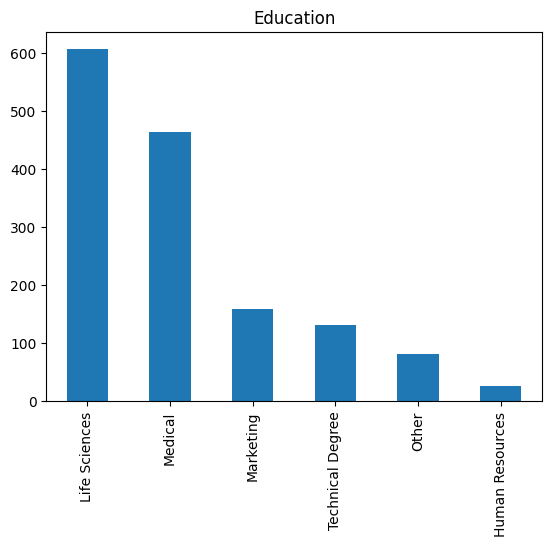

In [ ]:
data['EducationField'].value_counts().plot(kind='bar',title='Education')

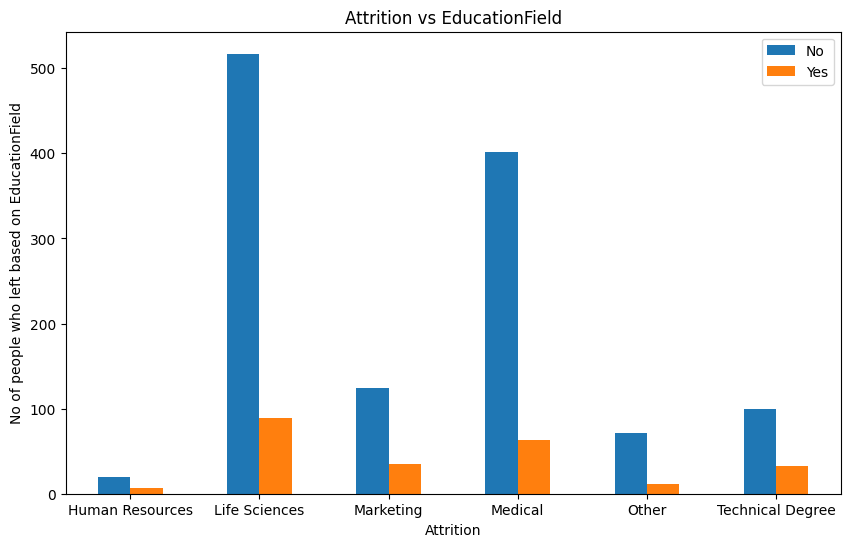

In [ ]:
plot_attr_vs_cols(data["EducationField"])

In [ ]:
travel_dict=data["BusinessTravel"].value_counts()
travel_dict

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot: title={'center': 'Business Travel'}>

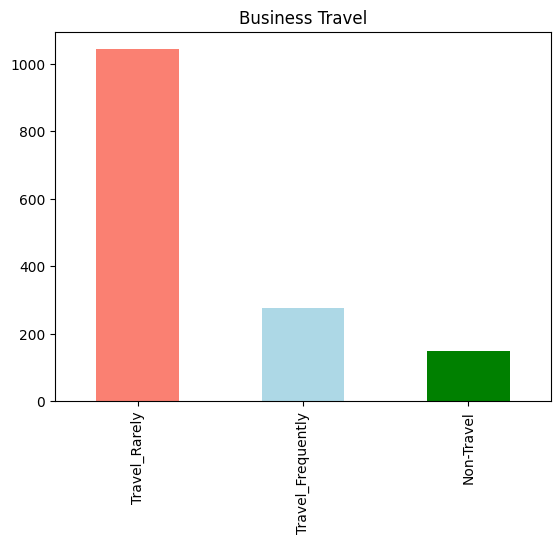

In [ ]:
data['BusinessTravel'].value_counts().plot(kind='bar',color=['salmon','lightblue','green'],title="Business Travel")

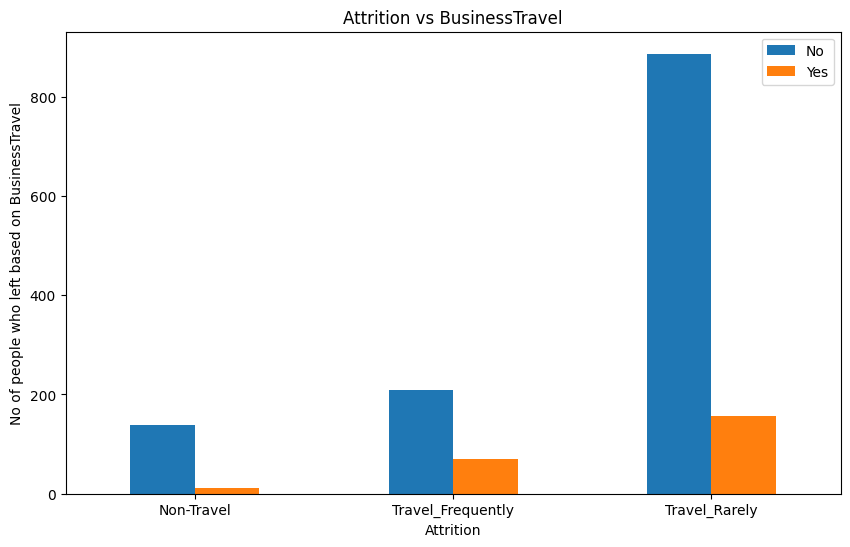

In [ ]:
plot_attr_vs_cols(data["BusinessTravel"])

### Visualize some continuous data

In [ ]:
import seaborn as sns

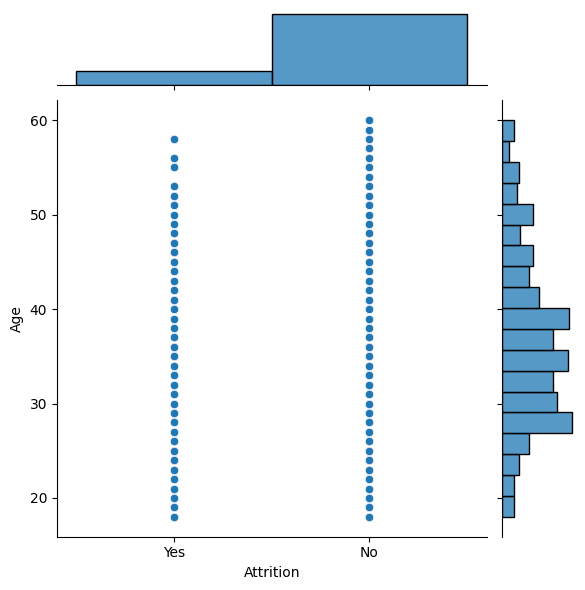

In [ ]:
sns.jointplot(x='Attrition',y='Age',data=data)

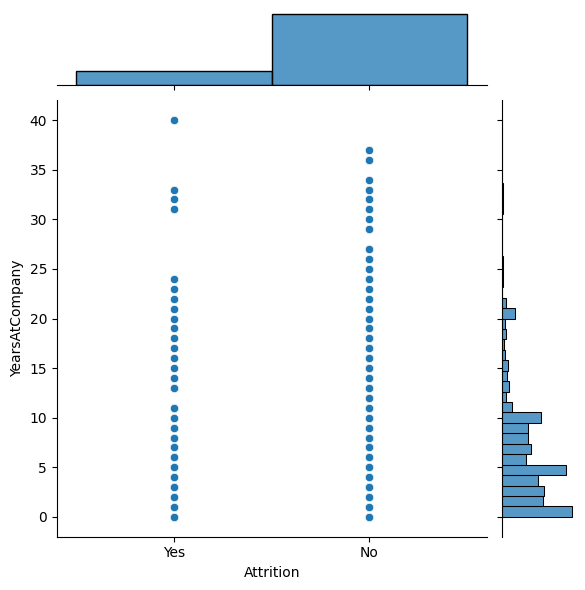

In [ ]:
sns.jointplot(x='Attrition',y='YearsAtCompany',data=data)

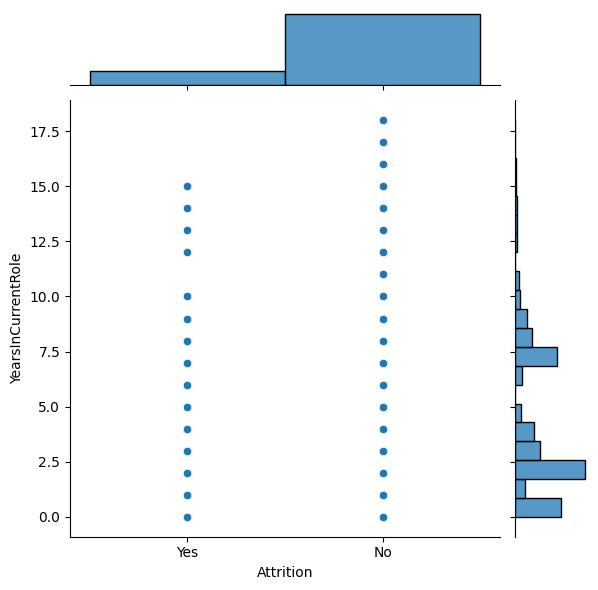

In [ ]:
sns.jointplot(x='Attrition',y='YearsInCurrentRole',data=data)

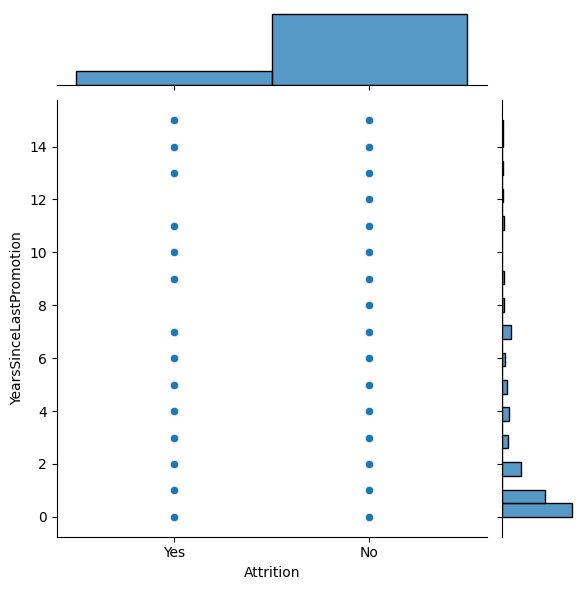

In [ ]:
sns.jointplot(x='Attrition',y='YearsSinceLastPromotion',data=data)

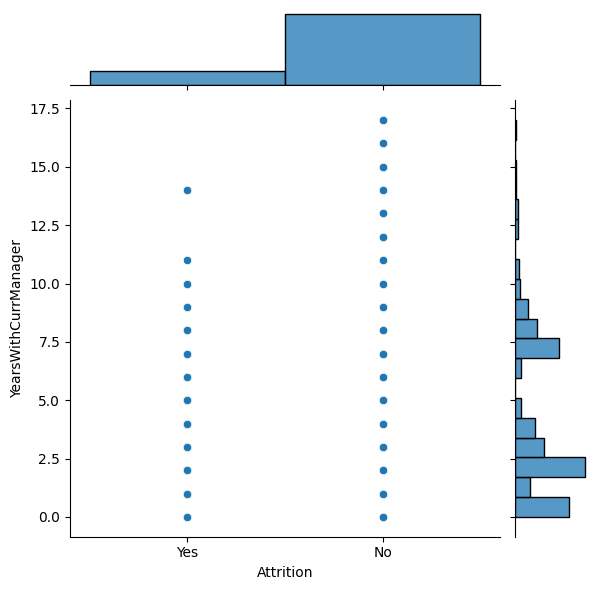

In [ ]:
sns.jointplot(x='Attrition',y='YearsWithCurrManager',data=data)

__Let's make our correlation matrix visual__

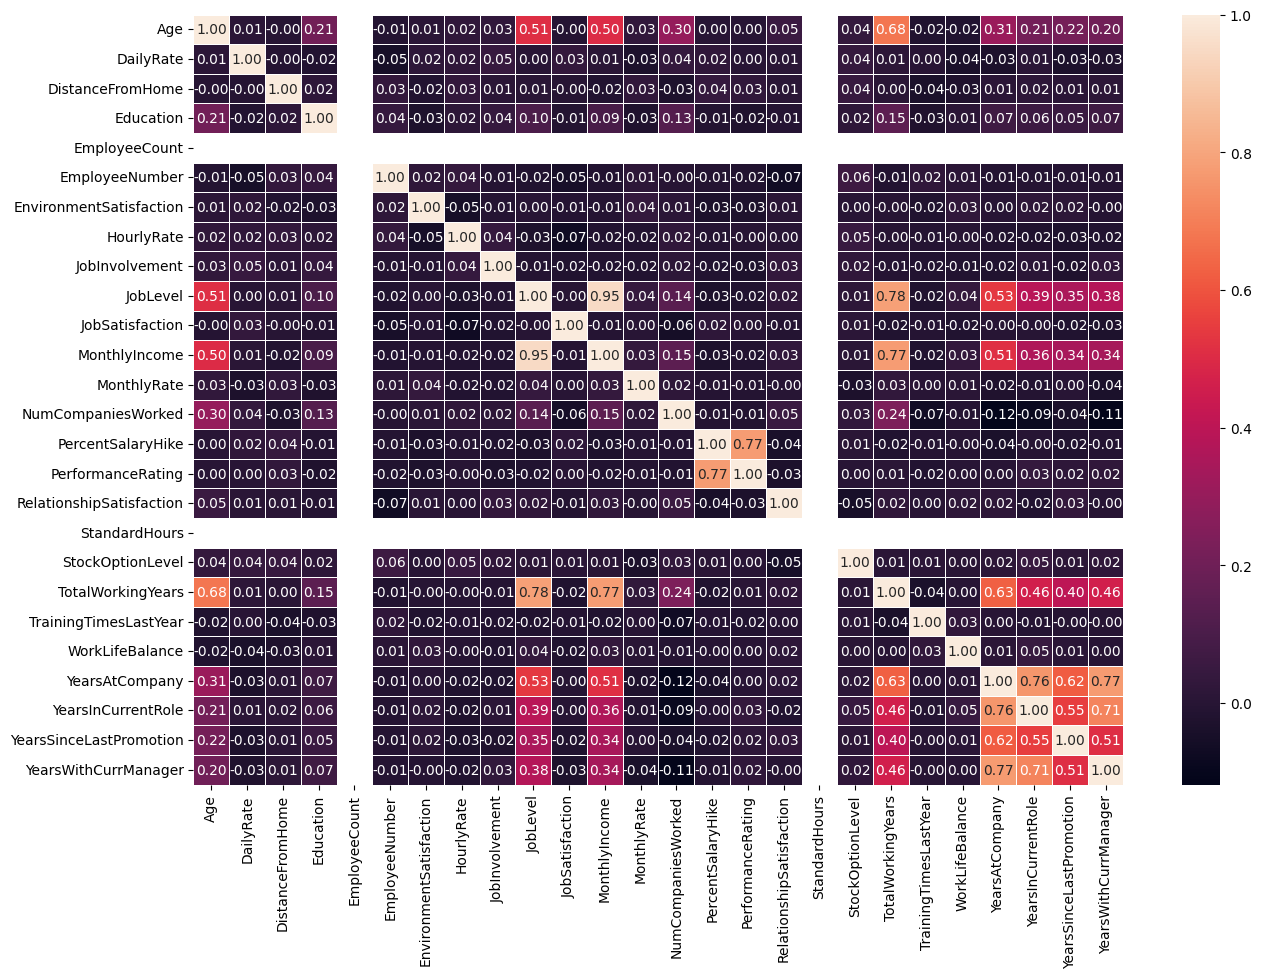

In [ ]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

__Drop irrelevant columns__

In [ ]:
data = data.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])

__Encode categorical variables using One-Hot Encoding__

In [ ]:
data = pd.get_dummies(data, drop_first=True)

__Separate features (X) and target variable (y)__

In [ ]:
X = data.drop(columns=['Attrition_Yes'])
y = data['Attrition_Yes']

__Split the dataset into training and testing sets (80% train, 20% test)__

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development, Evaluation and Optimization

__Evaluation Part__

In [ ]:
def evaluation(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Model Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return [accuracy*100,precision*100,recall*100,f1*100]

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    eval=evaluation(y_test, y_pred)
    return eval

### Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier Performance:")
rf_eval=evaluate_model(rf_classifier, X_test, y_test)

Random Forest Classifier Performance:
Model Performance:
Accuracy: 0.8775510204081632
Precision: 0.8
Recall: 0.10256410256410256
F1 Score: 0.18181818181818182


### Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model Performance:")
dt_eval=evaluate_model(dt_classifier, X_test, y_test)

Decision Tree Model Performance:
Model Performance:
Accuracy: 0.7585034013605442
Precision: 0.15217391304347827
Recall: 0.1794871794871795
F1 Score: 0.16470588235294117


### Logistic Regression

In [ ]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

print("Logistic Regression Model Performance:")
logistic_eval=evaluate_model(logistic_classifier, X_test, y_test)

Logistic Regression Model Performance:
Model Performance:
Accuracy: 0.8639455782312925
Precision: 0.3333333333333333
Recall: 0.02564102564102564
F1 Score: 0.047619047619047616


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

print("Support Vector Machine Model Performance:")
svm_eval=evaluate_model(svm_classifier, X_test, y_test)

Support Vector Machine Model Performance:
Model Performance:
Accuracy: 0.8673469387755102
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

print("Naive Bayes Model Performance:")
nb_eval=evaluate_model(nb_classifier, X_test, y_test)

Naive Bayes Model Performance:
Model Performance:
Accuracy: 0.7925170068027211
Precision: 0.34285714285714286
Recall: 0.6153846153846154
F1 Score: 0.4403669724770642


### XGBoost Classifier

In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

print("XGBoost Model Performance:")
xgb_eval=evaluate_model(xgb_classifier, X_test, y_test)

XGBoost Model Performance:
Model Performance:
Accuracy: 0.8775510204081632
Precision: 0.5882352941176471
Recall: 0.2564102564102564
F1 Score: 0.35714285714285715


### Kth Nearest Neighbour

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print("K-Nearest Neighbors Model Performance:")
knn_eval=evaluate_model(knn_classifier, X_test, y_test)

K-Nearest Neighbors Model Performance:
Model Performance:
Accuracy: 0.8469387755102041
Precision: 0.3125
Recall: 0.1282051282051282
F1 Score: 0.1818181818181818


### Gradient Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

print("Gradient Boosting Model Performance:")
gb_eval=evaluate_model(gb_classifier, X_test, y_test)

Gradient Boosting Model Performance:
Model Performance:
Accuracy: 0.8707482993197279
Precision: 0.5384615384615384
Recall: 0.1794871794871795
F1 Score: 0.2692307692307692


### AdaBoost Classifier

In [ ]:
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

print("AdaBoost Model Performance:")
adb_eval=evaluate_model(adaboost_classifier, X_test, y_test)

AdaBoost Model Performance:
Model Performance:
Accuracy: 0.8741496598639455
Precision: 0.5416666666666666
Recall: 0.3333333333333333
F1 Score: 0.4126984126984126


### Neural Networks

In [ ]:
nn_classifier = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_classifier.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

print("Neural Network Model Performance:")
loss, accuracy = nn_classifier.evaluate(X_test, y_test)
nn_eval=[accuracy*100,"-","-","-"]
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Neural Network Model Performance:
10/10 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8673
Test Loss: 0.4012455940246582, Test Accuracy: 0.8673469424247742


In [ ]:
from prettytable import PrettyTable 
from prettytable import TableHandler
import io
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall","F1 Score"]) 
 
# Add rows 
myTable.add_row(["RandomForestClassifier"]+rf_eval) 
myTable.add_row(["DecisionTreeClassifier"]+dt_eval) 
myTable.add_row(["LogisticRegression"]+logistic_eval)
myTable.add_row(["SVMClassifier"]+svm_eval)  
myTable.add_row(["NaiveBayesClassifier"]+nb_eval) 
myTable.add_row(["XGBoostClassifier"]+xgb_eval) 
myTable.add_row(["KNeighborsClassifier"]+knn_eval)
myTable.add_row(["GradientBoostingClassifier"]+gb_eval)  
myTable.add_row(["AdaBoostClassifier"]+adb_eval) 
myTable.add_row(["NeuralNetwork"]+nn_eval)

myTable.sortby = "Accuracy"
myTable.reversesort = True  # Set to True for descending order

myTable

Model Name,Accuracy,Precision,Recall,F1 Score
XGBoostClassifier,87.75510204081633,58.82352941176471,25.64102564102564,35.714285714285715
RandomForestClassifier,87.75510204081633,80.0,10.256410256410255,18.181818181818183
AdaBoostClassifier,87.41496598639455,54.166666666666664,33.33333333333333,41.269841269841265
GradientBoostingClassifier,87.07482993197279,53.84615384615385,17.94871794871795,26.923076923076923
NeuralNetwork,86.73469424247742,-,-,-
SVMClassifier,86.73469387755102,0.0,0.0,0.0
LogisticRegression,86.39455782312925,33.33333333333333,2.564102564102564,4.761904761904762
KNeighborsClassifier,84.6938775510204,31.25,12.82051282051282,18.18181818181818
NaiveBayesClassifier,79.25170068027211,34.285714285714285,61.53846153846154,44.03669724770642
DecisionTreeClassifier,75.85034013605441,15.217391304347828,17.94871794871795,16.470588235294116
